# Challenge 8

In [52]:
# Import Relevant Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, learning_curve, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Import Congressional Voting Records Data Set

In [2]:
columns = ['Class Name', 'handicapped-infants', 'water-project-cost-sharing', 'adoption-of-the-budget-resolution',
           'physician-fee-freeze', 'el-salvador-aid', 'religious-groups-in-schools', 'anti-satellite-test-ban',
           'aid-to-nicaraguan-contras', 'mx-missile', 'immigration', 'synfuels-corporation-cutback', 
           'education-spending', 'superfund-right-to-sue', 'crime', 'duty-free-exports', 
           'export-administration-act-south-africa']

In [3]:
vote_df = pd.read_csv('house-votes-84.csv',header=None,names=columns)

In [4]:
# Preview Data
vote_df.head(n=3)

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n


In [21]:
# Function to Replace Y with 1 & N with 0
def binary(x):
    if x == 'y': return 1
    elif x == 'n': return 0
    elif x == '?': return np.NaN
    elif x == 'democrat': return 1
    elif x == 'republican': return 0
    else: return x

In [22]:
vote_df = vote_df.applymap(lambda x: binary(x))

In [23]:
vote_df.fillna(vote_df.mean(),inplace=True)
vote_df.head(n=3)

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,0,0.00000,1.0,0.0,1.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.362319,1.0,1.0,1.0,0.0,1.000000
1,0,0.00000,1.0,0.0,1.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.000000,1.0,1.0,1.0,0.0,0.812689
2,1,0.44208,1.0,1.0,0.417453,1.0,1.0,0.0,0.0,0.0,0.0,1.000000,0.0,1.0,1.0,0.0,0.000000


**Create Target & Features**

In [24]:
y = vote_df.iloc[:,0]

In [25]:
X = vote_df.iloc[:,1:]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4444)

## Challenge 8.1

In [37]:
def get_scores(model, y_pred):
    print('Accuracy:',accuracy_score(y_test, y_pred))
    print('Precision:',precision_score(y_test, y_pred))
    print('Recall:',recall_score(y_test, y_pred))
    print('F1:', f1_score(y_test, y_pred))

**KNN**

In [36]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
knn_y_pred = knn.predict(X_test)

In [38]:
get_scores(knn, knn_y_pred)

Accuracy: 0.916030534351
Precision: 0.934210526316
Recall: 0.922077922078
F1: 0.928104575163


**Logistic Regression**

In [42]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_y_pred = logreg.predict(X_test)

In [43]:
get_scores(logreg, logreg_y_pred)

Accuracy: 0.93893129771
Precision: 0.925925925926
Recall: 0.974025974026
F1: 0.949367088608


**Gaussian Naive Bayes**

In [44]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_y_pred = gnb.predict(X_test)

In [45]:
get_scores(gnb, gnb_y_pred)

Accuracy: 0.93893129771
Precision: 0.915662650602
Recall: 0.987012987013
F1: 0.95


**Support Vector Machines**

In [112]:
svc = SVC(probability=True)
svc.fit(X_train, y_train)
svc_y_pred = svc.predict(X_test)

In [113]:
get_scores(svc, svc_y_pred)

Accuracy: 0.954198473282
Precision: 0.949367088608
Recall: 0.974025974026
F1: 0.961538461538


**Decision Tree**

In [48]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_y_pred = dt.predict(X_test)

In [49]:
get_scores(dt, dt_y_pred)

Accuracy: 0.93893129771
Precision: 0.936708860759
Recall: 0.961038961039
F1: 0.948717948718


**Random Forest**

In [50]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_y_pred = rf.predict(X_test)

In [51]:
get_scores(rf, rf_y_pred)

Accuracy: 0.946564885496
Precision: 0.926829268293
Recall: 0.987012987013
F1: 0.955974842767


## Challenge 8.2

In [101]:
def roc(y_test, y_pred):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    # Plot
    plt.figure(figsize=(12,8))
    plt.plot(fpr, tpr, label='AUC:{:.2f}'.format(auc))
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.plot([0,1],[0,1],'r--')

In [98]:
def roc_proba(y_test, y_proba):
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)
    
    # Plot
    plt.figure(figsize=(12,8))
    plt.plot(fpr, tpr, label='AUC:{:.2f}'.format(auc))
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.plot([0,1],[0,1],'r--')

**Logistic Regression**

In [99]:
logreg_y_proba = logreg.predict_proba(X_test)[:,1]

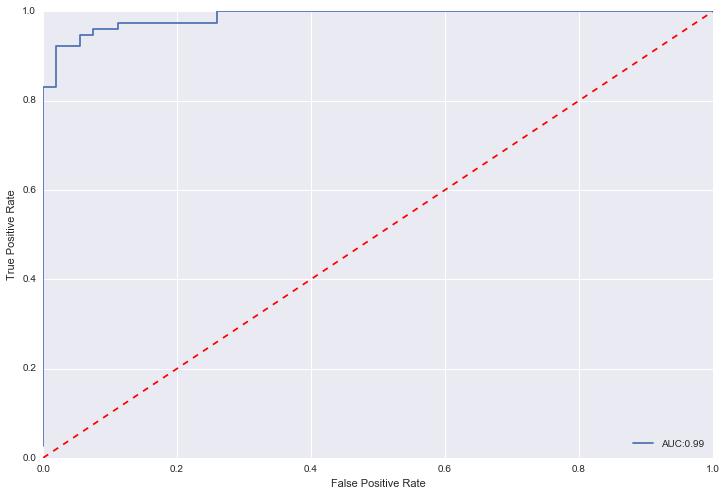

In [100]:
roc_proba(y_test, logreg_y_proba)

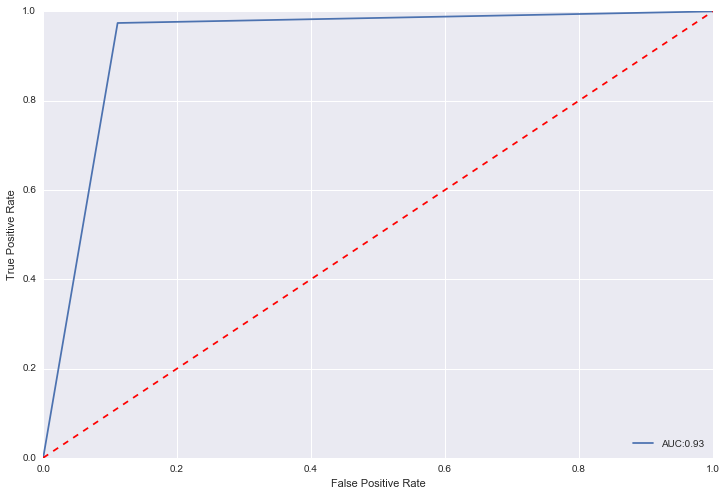

In [120]:
roc(y_test, logreg_y_pred)

**KNN**

In [105]:
knn_y_proba = knn.predict_proba(X_test)[:,1]

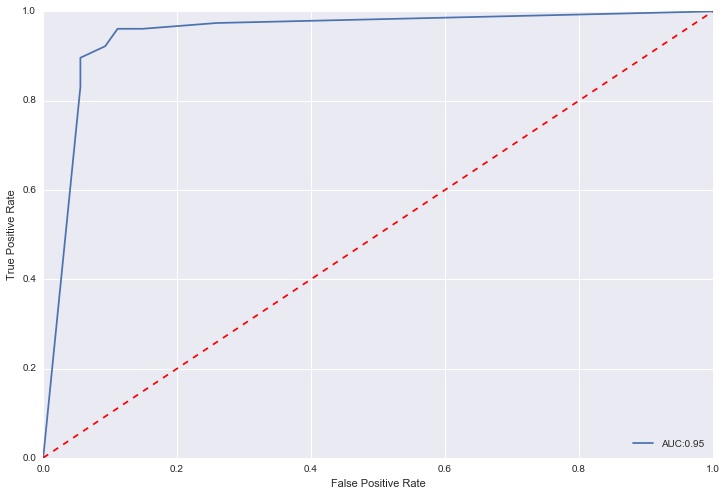

In [106]:
roc_proba(y_test, knn_y_proba)

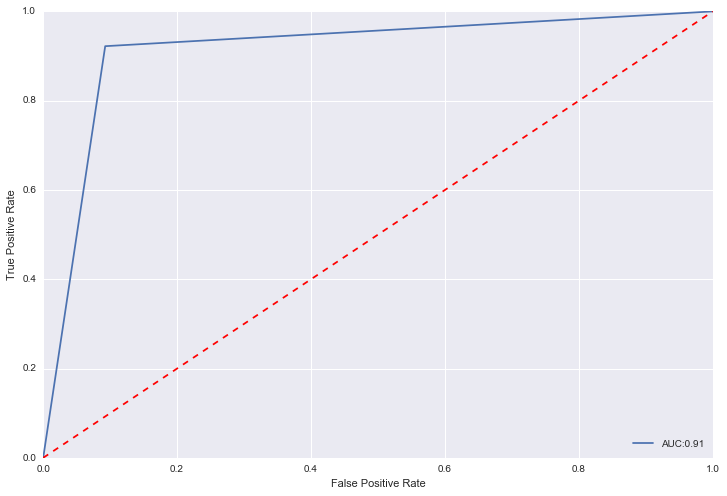

In [121]:
roc(y_test, knn_y_pred)

**Gausian Naive Bayes**

In [108]:
gnb_y_proba = gnb.predict_proba(X_test)[:,1]

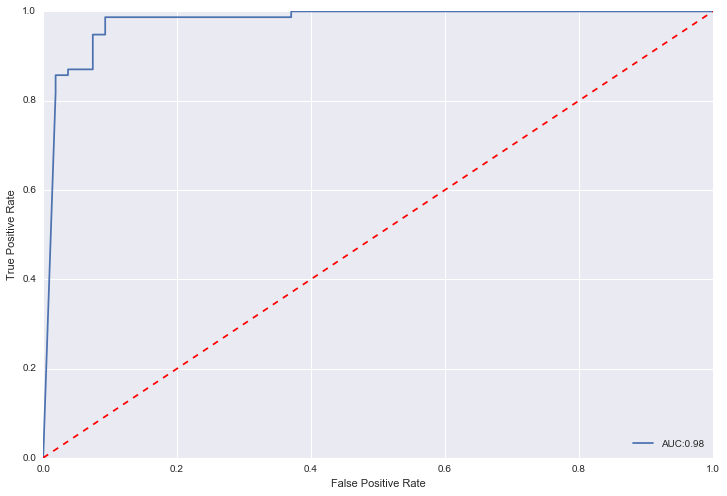

In [109]:
roc_proba(y_test, gnb_y_proba)

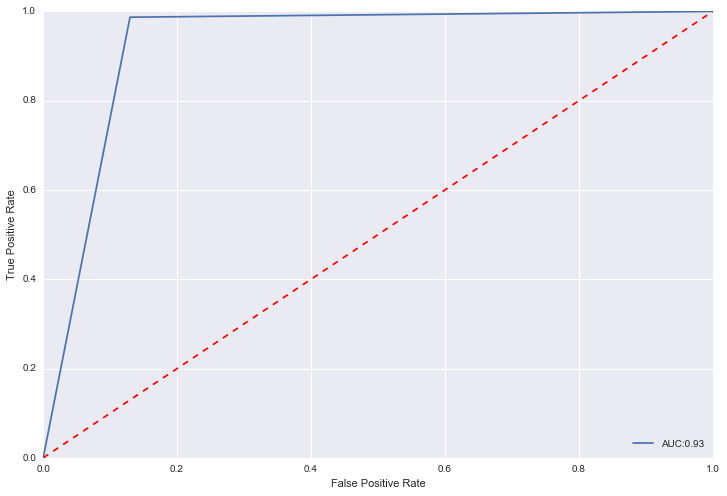

In [122]:
roc(y_test, gnb_y_pred)

**Support Vector Machines**

In [114]:
svc_y_proba = svc.predict_proba(X_test)[:,1]

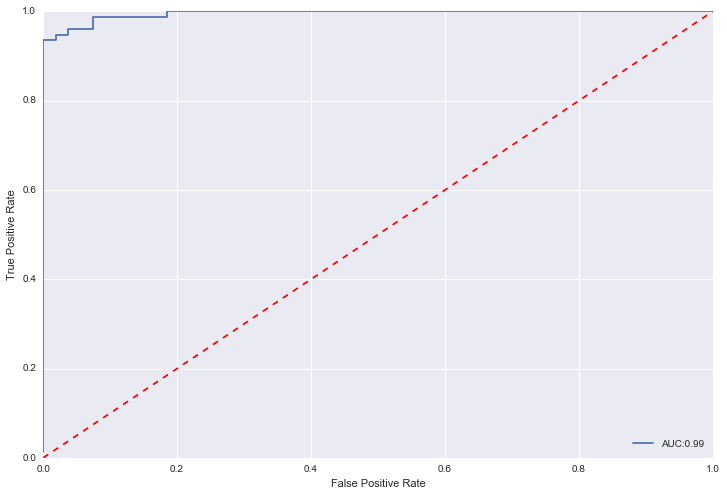

In [115]:
roc_proba(y_test, svc_y_proba)

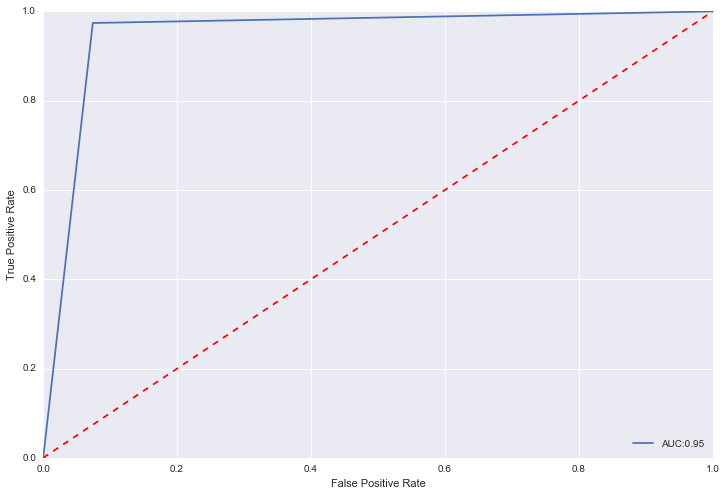

In [123]:
roc(y_test, svc_y_pred)

**Decision Tree**

In [116]:
dt_y_proba = dt.predict_proba(X_test)[:,1]

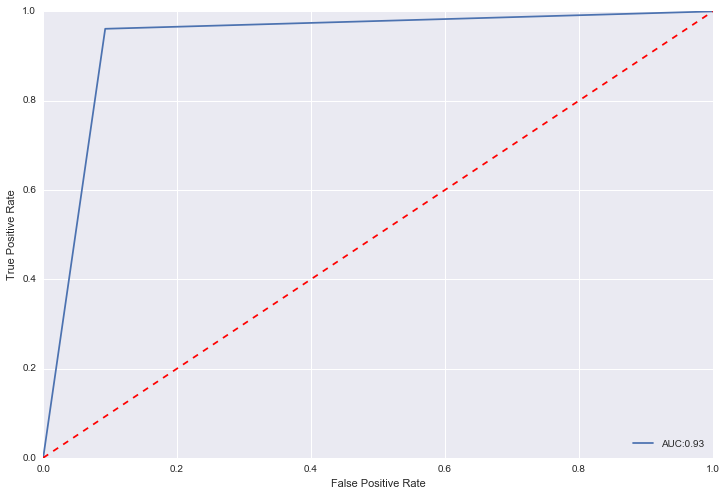

In [117]:
roc_proba(y_test, dt_y_proba)

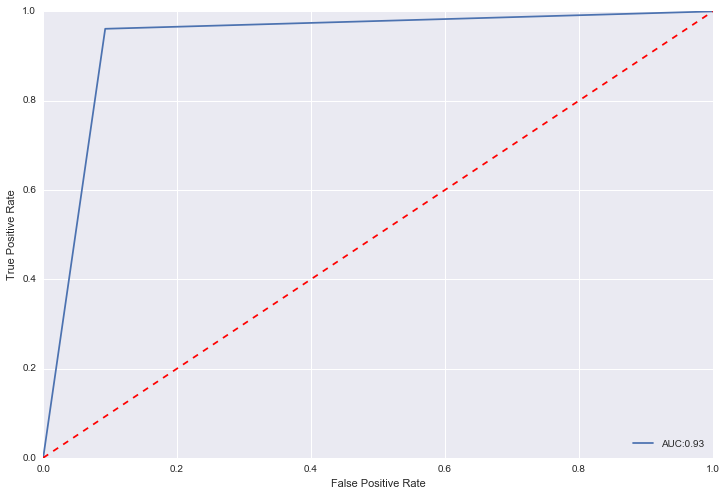

In [124]:
roc(y_test, dt_y_pred)

**Random Forest**

In [118]:
rf_y_proba = rf.predict_proba(X_test)[:,1]

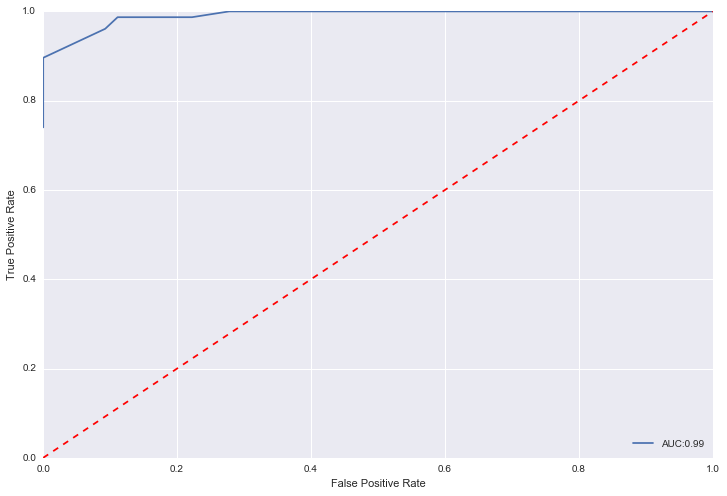

In [119]:
roc_proba(y_test, rf_y_proba)

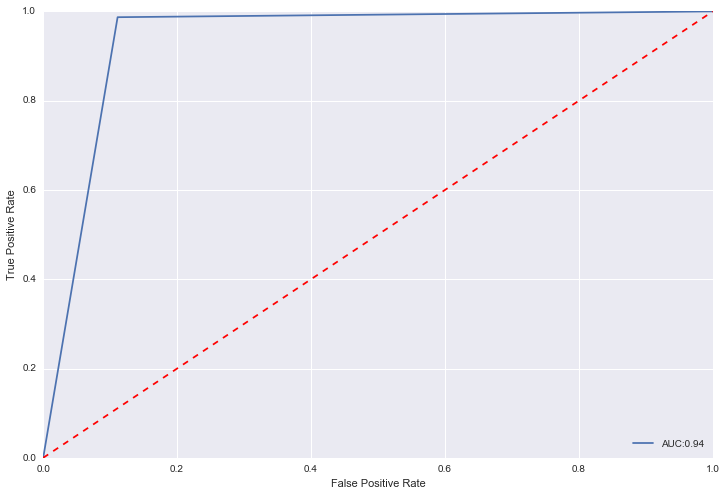

In [125]:
roc(y_test, rf_y_pred)

## Challenge 8.3

In [131]:
def cross_val_metrics(model,X,y):
    accuracys = cross_val_score(logreg,X,y,scoring='accuracy',cv=5)
    precisions = cross_val_score(logreg,X,y,scoring='precision',cv=5)
    recalls = cross_val_score(logreg,X,y,scoring='recall',cv=5)
    f1s = cross_val_score(logreg,X,y,scoring='f1',cv=5)
    
    print('Avg Accuracy:',np.mean(accuracys))
    print('Avg Precisions:', np.mean(precisions))
    print('Avg Recalls:',np.mean(recalls))
    print('Avg F1s:',np.mean(f1s))

**Logistic Regression**

In [132]:
cross_val_metrics(logreg, X, y)

Avg Accuracy: 0.958483997959
Avg Precisions: 0.969871575465
Avg Recalls: 0.962473794549
Avg F1s: 0.965724373089


**KNN**

In [133]:
cross_val_metrics(knn, X, y)

Avg Accuracy: 0.958483997959
Avg Precisions: 0.969871575465
Avg Recalls: 0.962473794549
Avg F1s: 0.965724373089


**Gaussian Naive Bayes**

In [134]:
cross_val_metrics(gnb, X, y)

Avg Accuracy: 0.958483997959
Avg Precisions: 0.969871575465
Avg Recalls: 0.962473794549
Avg F1s: 0.965724373089


**Support Vector Machines**

In [135]:
cross_val_metrics(svc, X, y)

Avg Accuracy: 0.958483997959
Avg Precisions: 0.969871575465
Avg Recalls: 0.962473794549
Avg F1s: 0.965724373089


**Decision Tree**

In [136]:
cross_val_metrics(dt, X, y)

Avg Accuracy: 0.958483997959
Avg Precisions: 0.969871575465
Avg Recalls: 0.962473794549
Avg F1s: 0.965724373089


**Random Forest**

In [137]:
cross_val_metrics(rf, X, y)

Avg Accuracy: 0.958483997959
Avg Precisions: 0.969871575465
Avg Recalls: 0.962473794549
Avg F1s: 0.965724373089


## Challenge 8.4

**Import Movie Data**

In [144]:
movie_df = pd.read_csv('2013_movies.csv')

In [145]:
# Preview Data
movie_df.head(n=3)

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00


In [246]:
movie_df['Rating'].value_counts()

PG-13    47
R        37
PG       15
G         1
Name: Rating, dtype: int64

In [248]:
movie_df = movie_df[movie_df['Rating']!='G']

**Set Target and Features**

In [275]:
y = movie_df['Rating']
X = movie_df.drop(['Rating','Title','Director','ReleaseDate'],axis=1)

In [276]:
X.fillna(X.mean(),inplace=True);

In [277]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4444)

**Logistic Regression**

In [278]:
movies_logreg = LogisticRegression()
movies_logreg.fit(X_train, y_train)
movies_logreg_y_pred = movies_logreg.predict(X_test)

In [279]:
precision_score(y_test, movies_logreg_y_pred, average = 'macro')

/Users/Masa/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.16666666666666666

In [280]:
recall_score(y_test, movies_logreg_y_pred, average = 'macro')

0.33333333333333331

In [281]:
cross_val_score(movies_logreg,X,y,scoring='precision_macro',cv=5)

/Users/Masa/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Masa/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Masa/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Masa/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Masa/anaconda/lib/pyt

array([ 0.41346154,  0.50877193,  0.1372549 ,  0.5       ,  0.5       ])

In [282]:
cross_val_score(movies_logreg,X,y,scoring='recall_macro',cv=5)

array([ 0.475     ,  0.41666667,  0.25925926,  0.38095238,  0.38095238])

## Challenge 8.5

In [178]:
columns = ['Patient Age','Year of Operation','Num Nodes Detected','Survival']
haberman = pd.read_csv('haberman.csv',header=None,names=columns)
haberman.head(n=3)

,Patient Age,Year of Operation,Num Nodes Detected,Survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1


In [204]:
haberman_y = haberman['Survival']
haberman_X = haberman.drop('Survival',axis=1)

In [230]:
haberman_y.replace(2, 0, inplace=True)

In [231]:
X_train, X_test, y_train, y_test = train_test_split(haberman_X, haberman_y, test_size=0.3, random_state=0)

**Create Model**

In [232]:
haberman_logreg = LogisticRegression()

In [233]:
haberman_logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [234]:
haberman_y_pred = haberman_logreg.predict(X_test)

In [241]:
haberman_y_proba = haberman_logreg.predict_proba(X_test)[:,1]

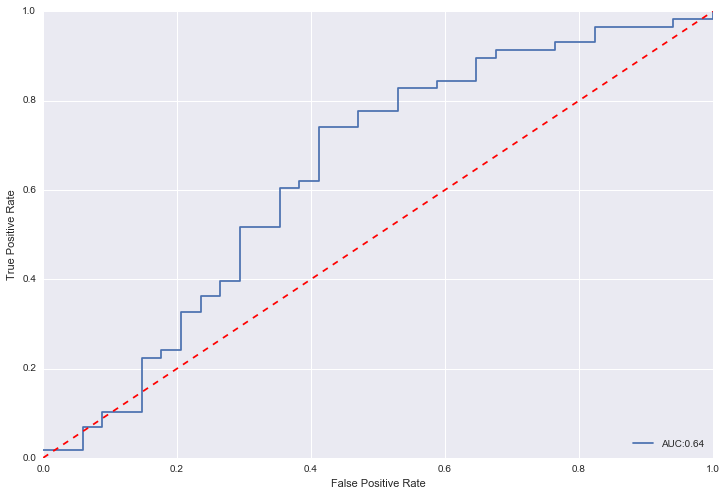

In [243]:
roc_proba(y_test, haberman_y_proba)

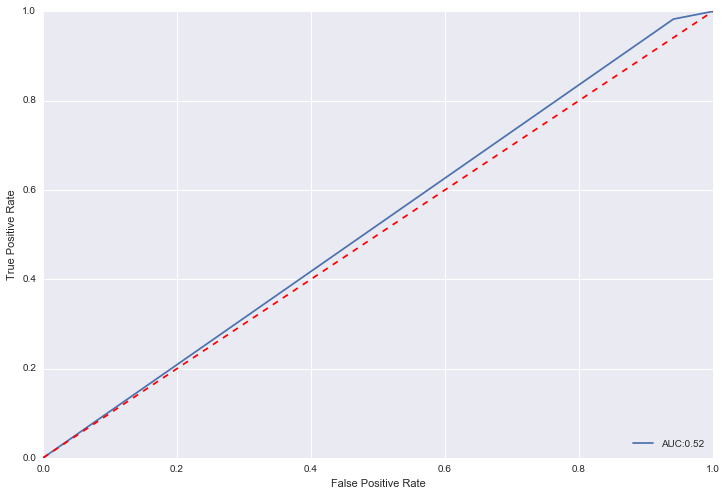

In [242]:
roc(y_test, haberman_y_pred)